In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('wine_data.csv',header=None,usecols=[0,1,2])
df.columns = ['Class label','Alcohol','Malic acid']

In [17]:
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

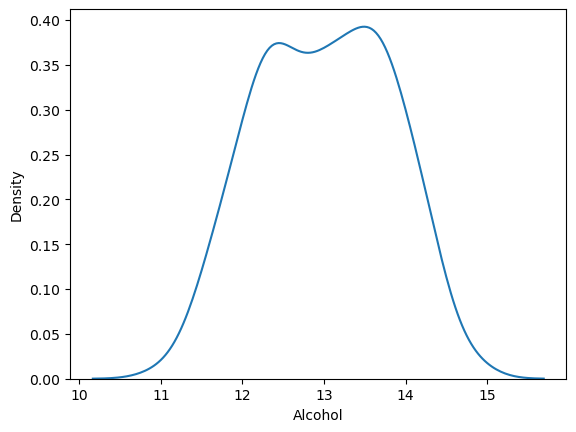

In [19]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic acid', ylabel='Density'>

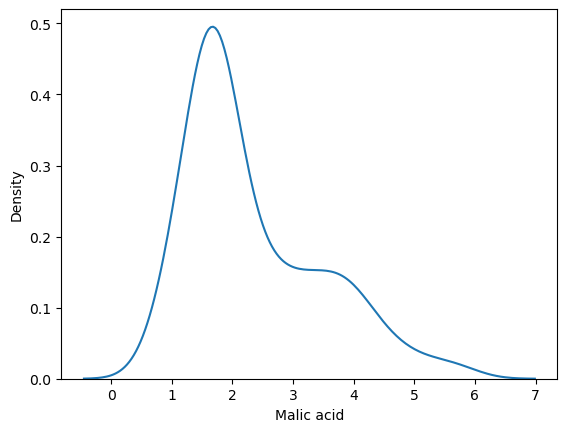

In [21]:
sns.kdeplot(df['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

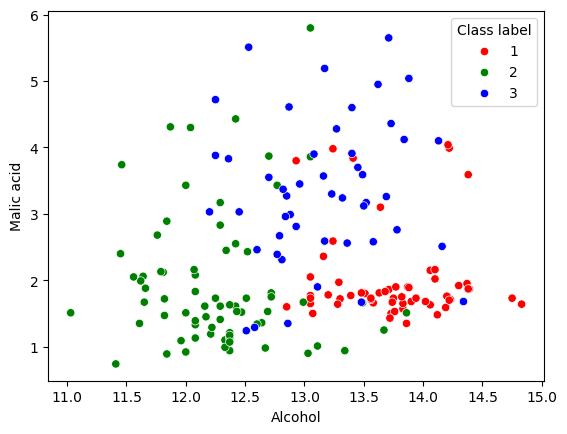

In [25]:
col = {1:'red',2:'green',3:'blue'}
sns.scatterplot(x='Alcohol',y='Malic acid',hue='Class label',data=df,palette=col)

In [29]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test = train_test_split(df.drop('Class label',axis=1),
                                                df['Class label'],
                                                test_size=0.3,
                                                random_state = 0)

In [33]:
x_train

,Alcohol,Malic acid
22,13.71,1.86
108,12.22,1.29
175,13.27,4.28
145,13.16,3.57
71,13.86,1.51
...,...,...
103,11.82,1.72
67,12.37,1.17
117,12.42,1.61
47,13.90,1.68


In [37]:
x_test.shape

(54, 2)

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
mms = MinMaxScaler()

# fit the scaler to the train set data
mms.fit(x_train)

# transfrom train and test set
x_train_scaled = mms.transform(x_train)
x_test_scaled = mms.transform(x_test)

In [45]:
x_train_scaled

array([[0.72043011, 0.20378151],
       [0.31989247, 0.08403361],
       [0.60215054, 0.71218487],
       [0.57258065, 0.56302521],
       [0.76075269, 0.1302521 ],
       [0.48924731, 0.5       ],
       [0.75537634, 0.67857143],
       [0.61021505, 0.17436975],
       [0.54301075, 0.62394958],
       [0.39784946, 0.07352941],
       [0.33870968, 0.1092437 ],
       [0.46774194, 0.53361345],
       [0.5188172 , 0.53781513],
       [0.70967742, 0.07563025],
       [0.57258065, 0.30882353],
       [0.36021505, 0.0105042 ],
       [0.38709677, 0.13235294],
       [0.20967742, 0.25840336],
       [0.59408602, 0.64915966],
       [0.82526882, 0.26680672],
       [0.15591398, 0.09663866],
       [0.52688172, 0.16386555],
       [0.46774194, 0.31512605],
       [0.65860215, 0.16386555],
       [0.1155914 , 0.5987395 ],
       [0.27956989, 0.26680672],
       [0.21236559, 0.12184874],
       [0.65053763, 0.59033613],
       [0.31451613, 0.44957983],
       [0.54301075, 0.17647059],
       [0.

In [49]:
x_test_scaled

array([[ 0.72849462,  0.16386555],
       [ 0.47311828,  0.37394958],
       [ 0.36021505,  0.05042017],
       [ 0.68010753,  0.17647059],
       [ 0.54301075,  1.03151261],
       [ 0.14247312,  0.24369748],
       [ 0.81451613,  0.26470588],
       [ 0.35752688,  0.61764706],
       [ 0.32795699,  0.17647059],
       [ 0.28225806,  0.19747899],
       [ 0.62634409,  0.35084034],
       [ 0.76612903,  0.87184874],
       [ 0.85215054,  0.18277311],
       [ 0.36021505,  0.03781513],
       [ 0.68548387,  0.35504202],
       [ 0.26075269,  0.00630252],
       [ 0.73387097,  0.13445378],
       [ 0.84946237,  0.14705882],
       [ 0.4327957 ,  0.0987395 ],
       [ 0.75268817,  0.15966387],
       [ 0.55913978,  0.02521008],
       [ 0.54301075,  0.15966387],
       [ 0.59408602,  0.35714286],
       [ 0.39784946,  0.17647059],
       [ 0.34946237,  0.04411765],
       [ 0.40053763,  0.32352941],
       [ 0.37634409,  0.13445378],
       [ 0.30376344,  0.1512605 ],
       [ 0.19623656,

In [51]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [53]:
np.round(x_train.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [59]:
np.round(x_train_scaled.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


Text(0.5, 1.0, 'After Scaling')

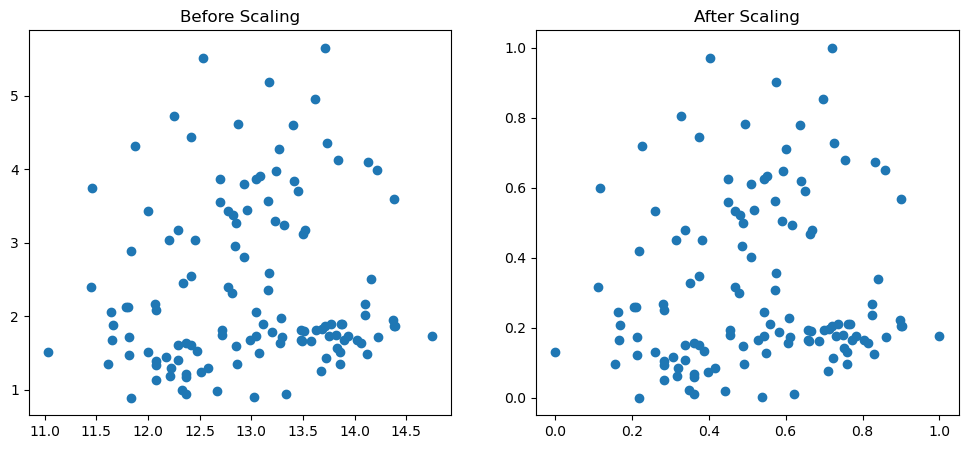

In [61]:
fig,(ax1,ax2)= plt.subplots(ncols =2,figsize=(12,5))

ax1.scatter(x_train['Alcohol'],x_train['Malic acid'])
ax1.set_title('Before Scaling')

ax2.scatter(x_train_scaled['Alcohol'],x_train_scaled['Malic acid'])
ax2.set_title('After Scaling')